In [1]:
id_num = '00' # this is the only line of code you need to change

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datafile = f'https://raw.githubusercontent.com/shawnrhoads/gu-psyc-347/master/docs/tasks/two-armed-bandit/data/sub-{id_num}_task-two-armed-bandit.csv'
df = pd.read_csv(datafile)
display(df.head())

,subject,type,condition,goal,block,block_num,block_instr_text,trial_num,stim_0,stim_0_value,...,outcomeDescr,outcome,feedback_text.started,feedback_text.stopped,participant,date,expName,psychopyVersion,frameRate,Unnamed: 60
0,0,0,self,win,self_win,1,Play to WIN points,0,stimuli/slot1_up.jpg,1,...,self avoid win,0,105.138390,None,0,2021_Mar_01_2315,two-armed-bandit,2021.1.0,60.000312,NaN
1,0,0,self,win,self_win,1,Play to WIN points,1,stimuli/slot1_up.jpg,1,...,self win,1,108.754971,None,0,2021_Mar_01_2315,two-armed-bandit,2021.1.0,60.000312,NaN
2,0,0,self,win,self_win,1,Play to WIN points,2,stimuli/slot1_up.jpg,1,...,self win,1,112.338230,None,0,2021_Mar_01_2315,two-armed-bandit,2021.1.0,60.000312,NaN
3,0,0,self,win,self_win,1,Play to WIN points,3,stimuli/slot1_up.jpg,1,...,self win,1,115.921452,None,0,2021_Mar_01_2315,two-armed-bandit,2021.1.0,60.000312,NaN
4,0,0,self,win,self_win,1,Play to WIN points,4,stimuli/slot1_up.jpg,0,...,self avoid win,0,119.421379,None,0,2021_Mar_01_2315,two-armed-bandit,2021.1.0,60.000312,NaN


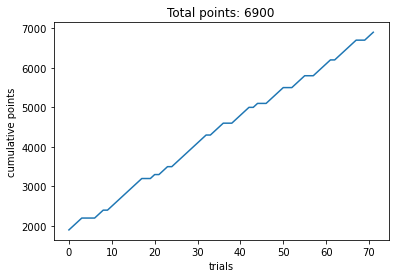

In [4]:
# points over trials
plt.plot(df['trial_num'], df['cumulativePts_self'])
plt.xlabel('trials')
plt.ylabel('cumulative points')
plt.title(f'Total points: {df.cumulativePts_self.values[-1]}')
plt.show()

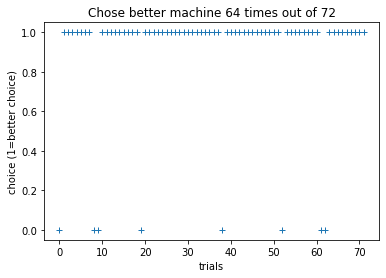

In [5]:
# compute which machine yielded rewards more frequently
if df['stim_0_value'].mean() > df['stim_1_value'].mean():
    better_machine = 'stim_0'
    better_machine_val = 'stim_0_value'
    better_machine_choice = 'chosen_stim_0'
else:
    better_machine = 'stim_1'
    better_machine_val = 'stim_1_value'
    better_machine_choice = 'chosen_stim_1'

# plot choices for this machine
plt.plot(df['trial_num'], df[better_machine_choice], '+')
plt.xlabel('trials')
plt.ylabel('choice (1=better choice)')
plt.title(f'Chose better machine {df[better_machine_choice].sum()} times out of {len(df[better_machine_choice])}')
plt.show()

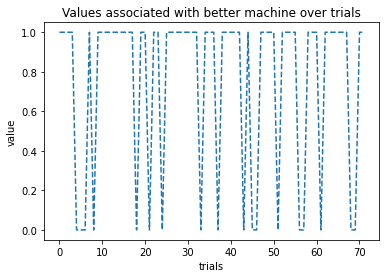

In [6]:
# plot values for this machine
plt.plot(df['trial_num'], df[better_machine_val], '--')
plt.xlabel('trials')
plt.ylabel('value')
plt.title(f'Values associated with better machine over trials')
plt.show()

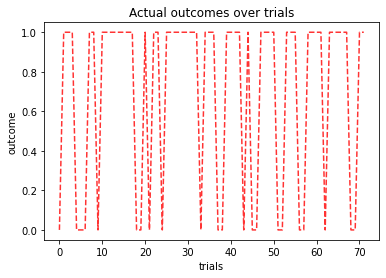

In [7]:
plt.plot(df['trial_num'], df['outcome'], 'r--', alpha=.8)
plt.xlabel('trials')
plt.ylabel('outcome')
plt.title(f'Actual outcomes over trials')
plt.show()

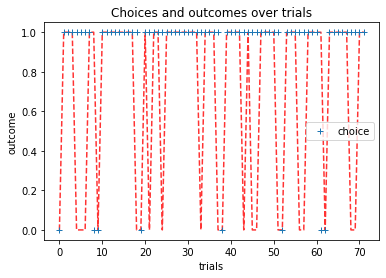

In [8]:
plt.plot(df['trial_num'], df['outcome'], 'r--', alpha=.8)
plt.plot(df['trial_num'], df[better_machine_choice], '+', label='choice')
plt.xlabel('trials')
plt.ylabel('outcome')
plt.title(f'Choices and outcomes over trials')
plt.legend()
plt.show()